In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
import random

In [14]:
def load_data(filepath):
    data = pd.read_csv(filepath)
    X = data.iloc[:, :-1].values
    y = data.iloc[:, -1].values

    return X, y

filepath = 'Boston_House.csv'
X, y = load_data(filepath)

print("Shape of X: ", X.shape, "Shape of y: ", y.shape)

Shape of X:  (506, 13) Shape of y:  (506,)


In [15]:
def random_feature_selection(X):
    random.seed(71)
    r = random.randint(9, 13)
    X_new = X[:, :r]

    return X_new

X = random_feature_selection(X)
print("Shape of X: ", X.shape, "Shape of y: ", y.shape)

Shape of X:  (506, 11) Shape of y:  (506,)


In [16]:
def train_test_split(X, y, test_size=0.25, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split_index = int(X.shape[0] * (1 - test_size))

    train_indices = indices[:split_index]
    test_indices = indices[split_index:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test

def min_max_scaler(X, feature_range=(0, 1)):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_scaled = (X-X_min)/(X_max-X_min)
    return X_scaled

X = min_max_scaler(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print("Shape of X_train: ", X_train.shape, "Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape, "Shape of y_test: ", y_test.shape)

Shape of X_train:  (379, 11) Shape of y_train:  (379,)
Shape of X_test:  (127, 11) Shape of y_test:  (127,)


In [17]:
def loss_function(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    squared_errors = (y - predictions) ** 2
    loss = np.sum(squared_errors)/m
    return loss

In [18]:
def compute_gradient(X, y, w, b):
    m = X.shape[0]
    predictions = np.dot(X, w) + b
    error = predictions - y
    dL_dw = np.dot(X.T, error) / m
    dL_db = np.sum(error) / m
    return dL_dw, dL_db

In [19]:
def batch_gradient_descent(X, y, w_initial, b_initial, alpha, num_iters, printFlag = False):
    m = X.shape[0]

    loss_hist = []

    w = copy.deepcopy(w_initial)
    b = b_initial


    for i in range(num_iters):
        dL_dw, dL_db = compute_gradient(X, y, w, b)

        w -= alpha * dL_dw
        b -= alpha * dL_db
        loss = loss_function(X, y, w, b)
        
        loss_hist.append(loss)

        if printFlag and i % 100 == 0:
            print(f"Iteration {i}: Loss = {loss}")

    return w, b, loss_hist


In [20]:
random_seed = 71
random.seed(random_seed)
np.random.seed(random_seed)

def initialize_parameters(X):
    alpha = random.uniform(0.0001, 0.001)
    num_features = X.shape[1]
    initial_w = np.random.randn(num_features)
    initial_b = 0

    return initial_w, initial_b, alpha

In [21]:
initial_w, initial_b, alpha = initialize_parameters(X_train)

num_iters = 10000

w,b,loss_hist = batch_gradient_descent(X_train ,y_train, initial_w, initial_b, alpha, num_iters, True)

print("Updated w: ",w)
print("Updated b: ",b)

Iteration 0: Loss = 597.2067664354943
Iteration 100: Loss = 505.33269202060666
Iteration 200: Loss = 431.8361089040912
Iteration 300: Loss = 372.9700397089757
Iteration 400: Loss = 325.7529860450158
Iteration 500: Loss = 287.812514470307
Iteration 600: Loss = 257.2608039941867
Iteration 700: Loss = 232.59562410605082
Iteration 800: Loss = 212.62154686149583
Iteration 900: Loss = 196.3872584028738
Iteration 1000: Loss = 183.13568015961224
Iteration 1100: Loss = 172.26428220165388
Iteration 1200: Loss = 163.29350608438224
Iteration 1300: Loss = 155.84164009417486
Iteration 1400: Loss = 149.60482841341903
Iteration 1500: Loss = 144.3411651420611
Iteration 1600: Loss = 139.85803847810956
Iteration 1700: Loss = 136.00206092147374
Iteration 1800: Loss = 132.65105707487675
Iteration 1900: Loss = 129.70768859410052
Iteration 2000: Loss = 127.09438175403061
Iteration 2100: Loss = 124.74929145547614
Iteration 2200: Loss = 122.62308988788207
Iteration 2300: Loss = 120.67641133911738
Iteration 240

In [22]:
train_error = loss_function(X_train,y_train,w,b)
test_error = loss_function(X_test,y_test,w,b)
print("Train Error: ",train_error, ", Test Error: ",test_error)

Train Error:  66.08153782432943 , Test Error:  58.54817310925999


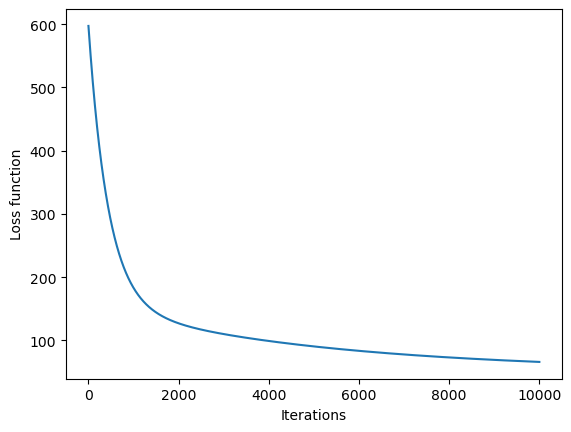

In [23]:
loss_plot = [loss_hist[i] for i in range(len(loss_hist))]
plt.xlabel("Iterations")
plt.ylabel("Loss function")
plt.plot(loss_plot)
plt.show()

In [24]:
num_features = 11
learning_rate = 0.1
num_iters = 1000

X_train = X_train[:, :num_features]
X_test = X_test[:, :num_features]

initial_w = np.zeros(num_features)
initial_b = 0

w, b, loss_hist = batch_gradient_descent(X_train, y_train, initial_w, initial_b, learning_rate, num_iters)

train_error_manual = loss_function(X_train, y_train, w, b)
test_error_manual = loss_function(X_test, y_test, w, b)

print("\nPerformance Comparison:\n")

print("Train Error (Random Hyperparameters):", train_error)
print("Train Error (Manual Hyperparameters):", train_error_manual)
train_error_diff = (train_error - train_error_manual) / train_error * 100
train_perf = "Manual" if train_error_manual < train_error else "Random"
print(f"Train Error Difference: {train_error_diff:.2f}% ({train_perf} performed better)\n")

print("Test Error (Random Hyperparameters):", test_error)
print("Test Error (Manual Hyperparameters):", test_error_manual)
test_error_diff = (test_error - test_error_manual) / test_error * 100
test_perf = "Manual" if test_error_manual < test_error else "Random"
print(f"Test Error Difference: {test_error_diff:.2f}% ({test_perf} performed better)")


Performance Comparison:

Train Error (Random Hyperparameters): 66.08153782432943
Train Error (Manual Hyperparameters): 30.056539536785674
Train Error Difference: 54.52% (Manual performed better)

Test Error (Random Hyperparameters): 58.54817310925999
Test Error (Manual Hyperparameters): 28.380108369570134
Test Error Difference: 51.53% (Manual performed better)
